<a href="https://colab.research.google.com/github/Rishi-128/ml4sci-anomaly-detection-dqm/blob/main/04_data_drift_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Drift Simulation in Detector Monitoring

In real high-energy physics experiments, detector conditions are not static.
Temperature changes, hardware aging, calibration shifts, and environmental
effects cause the data distribution to drift over time.

This notebook demonstrates how a fixed anomaly detection model degrades
when the underlying data distribution slowly changes, motivating the need
for continuous learning approaches.


In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

torch.manual_seed(42)
np.random.seed(42)


In [2]:
class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, input_dim)
        )

    def forward(self, x):
        return self.decoder(self.encoder(x))


In [5]:
# Quick training on normal data for demonstration
normal_data = np.random.normal(0, 1, size=(5000, 10))
data_tensor = torch.tensor(normal_data, dtype=torch.float32)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.MSELoss()

for epoch in range(10):
    optimizer.zero_grad()
    recon = model(data_tensor)
    loss = criterion(recon, data_tensor)
    loss.backward()
    optimizer.step()

print("Model trained for drift experiment.")


Model trained for drift experiment.


In [6]:
def generate_drifted_data(step, samples=1000):
    """
    Gradually shift mean to simulate detector drift
    """
    drift_strength = step * 0.2
    return np.random.normal(
        loc=drift_strength,
        scale=1.0,
        size=(samples, 10)
    )


In [7]:
time_steps = 15
avg_errors = []

for t in range(time_steps):
    data = generate_drifted_data(t)
    data_tensor = torch.tensor(data, dtype=torch.float32)

    with torch.no_grad():
        recon = model(data_tensor)
        error = torch.mean((data_tensor - recon) ** 2, dim=1)

    avg_errors.append(error.mean().item())


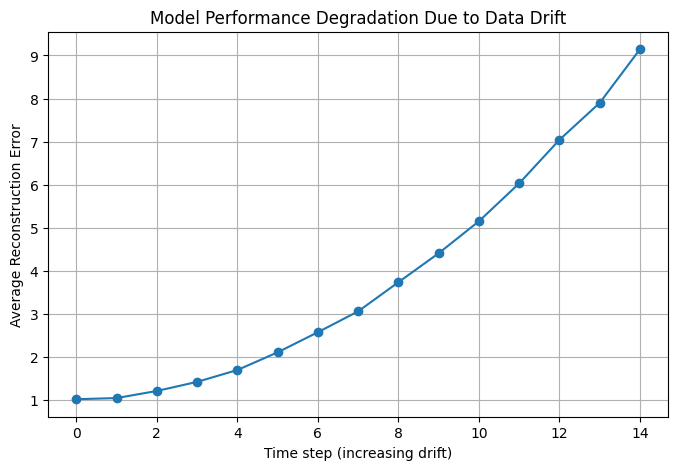

In [8]:
plt.figure(figsize=(8, 5))
plt.plot(avg_errors, marker='o')
plt.xlabel("Time step (increasing drift)")
plt.ylabel("Average Reconstruction Error")
plt.title("Model Performance Degradation Due to Data Drift")
plt.grid(True)
plt.show()


### Observation

The plot shows a steady increase in the average reconstruction error as the data distribution drifts over time. This indicates that the autoencoder, trained on earlier detector conditions, gradually becomes less effective at reconstructing new data.

### Interpretation

This behavior is expected in real detector systems where operating conditions evolve over time. As the detector state changes, a static machine learning model trained on historical data may no longer represent the current data distribution accurately.

### Motivation for Continuous Learning

This performance degradation motivates the need for continuous or adaptive learning strategies, where models are periodically updated or adapted to maintain reliable data quality monitoring.
